# Запросы на выборку, соединение таблиц

### 60 Соединение INNER JOIN

Оператор внутреннего соединения __INNER JOIN__ соединяет две таблицы. Порядок таблиц для оператора неважен, поскольку оператор является симметричным.

Вывести название, жанр и цену тех книг, количество которых больше 8, в отсортированном по убыванию цены виде.

Логическая схема базы данных:
    
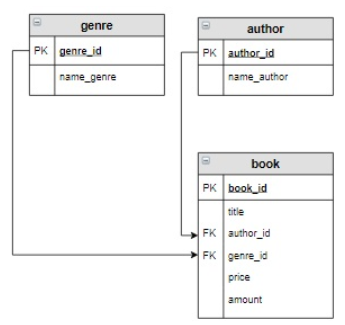

In [ ]:
SELECT b.title AS title, 
       g.name_genre AS name_genre, 
       b.price AS price
  FROM book AS b JOIN genre AS g
       ON b.genre_id = g.genre_id
 WHERE amount > 8
 ORDER BY price DESC

### 61 Внешнее соединение LEFT и RIGHT OUTER JOIN

Оператор внешнего соединения __LEFT OUTER JOIN__  (можно использовать __LEFT JOIN__) соединяет две таблицы. Порядок таблиц для оператора важен, поскольку оператор не является симметричным.

Вывести все жанры, которые не представлены в книгах на складе.

Логическая схема базы данных:
    
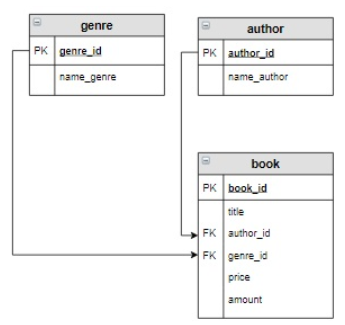

In [ ]:
SELECT g.name_genre
  FROM genre AS g LEFT JOIN book AS b
       ON g.genre_id = b.genre_id
 WHERE b.title IS NULL

### 62 Перекрестное соединение CROSS JOIN

Оператор перекрёстного соединения, или декартова произведения CROSS JOIN (в запросе вместо ключевых слов можно поставить запятую между таблицами) соединяет две таблицы. Порядок таблиц для оператора неважен, поскольку оператор является симметричным.  
Результат запроса формируется так: каждая строка одной таблицы соединяется с каждой строкой другой таблицы, формируя  в результате все возможные сочетания строк двух таблиц.  

Есть список городов, хранящийся в таблице `city`:  
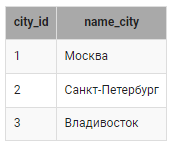
Необходимо в каждом городе провести выставку книг каждого автора в течение 2020 года. Дату проведения выставки выбрать случайным образом. Создать запрос, который выведет город, автора и дату проведения выставки. Последний столбец назвать Дата. Информацию вывести, отсортировав сначала в алфавитном порядке по названиям городов, а потом по убыванию дат проведения выставок.

Структура таблицы:
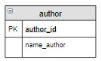

In [ ]:
SELECT name_city, 
       name_author, 
       DATE_ADD('2020-01-01', INTERVAL FLOOR(RAND() * 365) DAY) AS Дата
  FROM city AS c, a
       uthor AS a
 ORDER BY name_city,
          Дата DESC

### 63 Запросы на выборку из нескольких таблиц

Вывести информацию о книгах (жанр, книга, автор), относящихся к жанру, включающему слово «роман» в отсортированном по названиям книг виде.

Логическая схема базы данных:

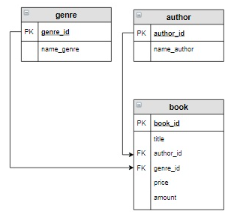

In [ ]:
SELECT g.name_genre AS name_genre, 
       b.title AS title, 
       a.name_author AS name_author
  FROM genre AS g JOIN book AS b
       ON g.genre_id = b.genre_id
       JOIN author AS a
       ON b.author_id = a.author_id
 WHERE name_genre = 'Роман'
 ORDER BY title

### 64 Запросы для нескольких таблиц с группировкой

Посчитать количество экземпляров  книг каждого автора из таблицы `author`.  Вывести тех авторов,  количество книг которых меньше 10, в отсортированном по возрастанию количества виде. Последний столбец назвать Количество.

Логическая схема базы данных:

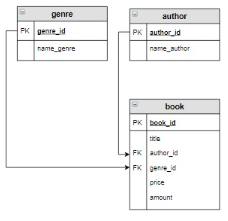

SELECT a.name_author AS name_author,
       SUM(b.amount) AS Количество
FROM author AS a LEFT JOIN book AS b
     ON a.author_id = b.author_id
GROUP BY a.name_author
HAVING SUM(b.amount) < 10 OR COUNT(title) = 0
ORDER BY Количество 

### 65 Запросы для нескольких таблиц со вложенными запросами

Вывести в алфавитном порядке всех авторов, которые пишут только в одном жанре. Поскольку у нас в таблицах так занесены данные, что у каждого автора книги только в одном жанре,  для этого запроса внесем изменения в таблицу `book`. Пусть у нас  книга Есенина «Черный человек» относится к жанру «Роман», а книга Булгакова «Белая гвардия» к «Приключениям» (эти изменения в таблицы уже внесены).

Логическая схема базы данных:

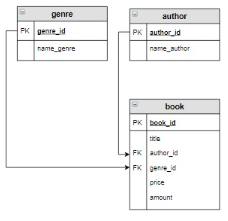

In [ ]:
SELECT a.name_author AS name_author
  FROM (SELECT author_id, COUNT(DISTINCT(genre_id))
          FROM book
         GROUP BY author_id
        HAVING COUNT(DISTINCT(genre_id)) = 1
       ) AS query_in
       JOIN author AS a
       ON query_in.author_id = a.author_id

### 66 Вложенные запросы в операторах соединения

Вывести информацию о книгах (название книги, фамилию и инициалы автора, название жанра, цену и количество экземпляров книги), написанных в самых популярных жанрах, в отсортированном в алфавитном порядке по названию книг виде. Самым популярным считать жанр, общее количество экземпляров книг которого на складе максимально.

Логическая схема базы данных:

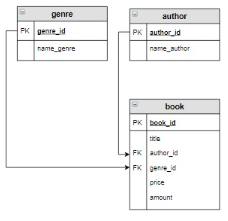

In [ ]:
SELECT b.title AS title, 
       a.name_author AS name_author, 
       g.name_genre AS name_genre, 
       b.price AS price, 
       b.amount AS amount
  FROM genre AS g JOIN book AS b
       ON g.genre_id = b.genre_id
       JOIN author AS a
       ON b.author_id = a.author_id
 WHERE g.genre_id IN (SELECT sq2.genre_id
                        FROM (SELECT genre_id, 
                                     SUM(amount) AS sum_amount
                                FROM book
                               GROUP BY genre_id
                               LIMIT 1) AS sq1
                             JOIN (SELECT genre_id, 
                                          SUM(amount) AS sum_amount
                                     FROM book
                                    GROUP BY genre_id) AS sq2
                             ON sq1.sum_amount = sq2.sum_amount)
                       ORDER BY title

### 67 Операция соединение, использование USING()

Если в таблицах `supply`  и `book` есть одинаковые книги, которые имеют равную цену,  вывести их название и автора, а также посчитать общее количество экземпляров книг в таблицах supply и book,  столбцы назвать Название, Автор  и Количество.

В таблице `supply` занесена информация о книгах, поступивших на склад.

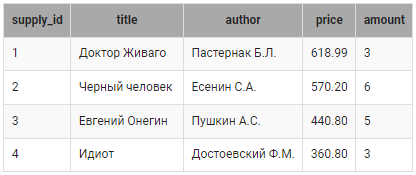

Схема данных:

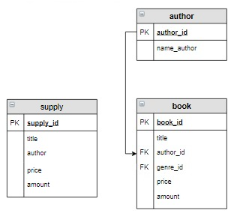

In [ ]:
SELECT book.title AS Название, 
       name_author AS Автор, 
       supply.amount + book.amount AS Количество
  FROM book JOIN author USING(author_id)
       JOIN supply 
       ON book.title = supply.title 
       AND book.price = supply.price

### 68

Для каждого автора из таблицы `author` вывести количество книг, написанных им в каждом жанре.
Вывод: ФИО автора, жанр, количество. Отсортировать по фамилии, затем - по убыванию количества написанных книг.

Логическая схема базы данных:

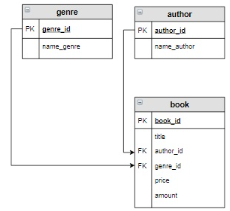

In [ ]:
SELECT author.name_author, 
       genre.name_genre,  
       (IF(COUNT(book.title) > 0, COUNT(book.title), 0)) AS Количество
  FROM author CROSS JOIN genre
       LEFT JOIN book ON author.author_id = book.author_id AND
                         genre.genre_id = book.genre_id
 GROUP BY name_author, 
          name_genre
 ORDER BY name_author, 
          Количество DESC